## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
import pandas as pd
import yfinance as yf
from methods.screener_methods import *
from tqdm import tqdm

### Single import

HVID.CO


,Ticker,Name,Earnings,Signal,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,HVID.CO,Hvidbjerg Bank A/S,NaN,Hold,0.18,0.11,0.06,0.1,0.73,-0.79,...,1.35,96.75,1.26,NaN,0.0,0.07,Financial Services,Banks - Regional,Denmark,False


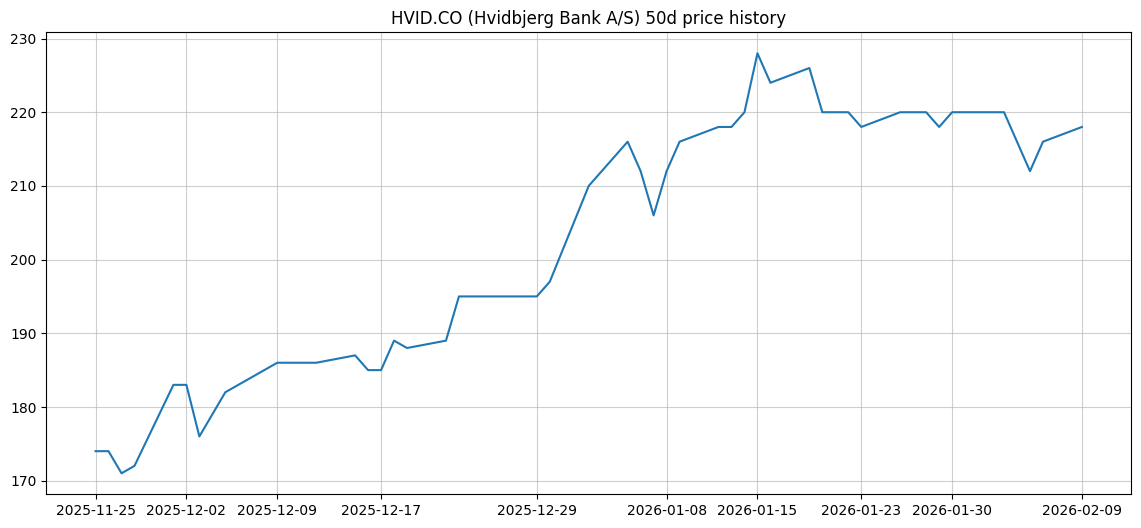

50d Average Change%: 0.07


In [3]:
symbol = "HVID.CO"
stock = Stock(symbol)
print(stock.symbol)
display(stock.summary())
stock.price_graph("50d")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Final Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 83/83 [01:08<00:00,  1.22it/s]


,Ticker,Name,Earnings,Signal,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,TRMD,TORM plc,26-02-2026,Buy,3.20,1.76,1.44,0.16,0.85,0.58,...,5.99,2.73,1.13,0.42,0.0,0.15,Energy,Oil & Gas Midstream,United Kingdom,True
0,MTHH.CO,MT Højgaard Holding A/S,20-02-2026,Buy,2.55,1.56,0.99,0.20,0.67,0.71,...,6.62,44.88,3.64,0.20,0.0,0.09,Industrials,Engineering & Construction,Denmark,True
0,BAVA.CO,Bavarian Nordic A/S,14-11-2025,Buy,2.35,2.38,-0.03,0.36,0.96,0.83,...,7.78,30.69,1.15,0.01,0.0,-0.00,Healthcare,Biotechnology,Denmark,False
0,STG.CO,Scandinavian Tobacco Group A/S,04-03-2026,Buy,2.11,1.44,0.67,0.22,0.74,0.40,...,5.37,9.20,0.95,0.65,0.0,0.06,Consumer Defensive,Tobacco,Denmark,True
0,RBLN-B.CO,Roblon B A/S,NaN,Buy,1.70,2.21,-0.51,0.32,0.76,0.90,...,11.62,11.80,1.14,0.20,0.0,-0.03,Industrials,Electrical Equipment & Parts,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,GN.CO,GN Store Nord A/S,05-02-2026,Sell,-1.09,-0.65,-0.44,0.05,-0.34,-0.30,...,3.56,4.48,1.30,0.99,0.0,-0.10,Healthcare,Medical Devices,Denmark,False
0,HIMS,"Hims & Hers Health, Inc.",23-02-2026,Sell,-1.39,-0.69,-0.69,-0.00,-1.05,0.46,...,5.54,0.53,7.57,1.92,40.1,-0.42,Healthcare,Drug Manufacturers - Specialty & Generic,United States,False
0,HARB-B.CO,Harboes Bryggeri B A/S,NaN,Sell,-2.05,-1.57,-0.48,0.03,-1.10,-0.75,...,1.70,2.03,0.62,0.23,0.0,-0.04,Consumer Defensive,Beverages - Brewers,Denmark,False
0,VWS.CO,Vestas Wind Systems A/S,06-05-2026,Sell,-2.27,-1.54,-0.73,0.18,-0.86,-0.59,...,2.65,5.75,5.62,0.87,0.0,-0.06,Industrials,Specialty Industrial Machinery,Denmark,False
